Let's sample and perform an 8-point DFT on a continuous input signal containing components at 1 kHz and 2 kHz and sample it every t_s = 1 / f_s. f_s =  8 kHz.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint

Generate a sequence of time points for signal processing.

In [3]:
# samp_rate is the number of samples per second (for instance value 100 means 100 Hz).
f_s = 8000

# N - number of elements (samples) for DFT
# n - the indice for the input samples ( n = N - 1 )
# m - the indice for the output samples ( m = N - 1 )
N = 8

# Time interval between each sample
t_s = 1.0 / f_s

# t is an array of time points. It starts at 0 seconds, ends just before 1 second, incrementing by time_s with each step.
t = np.arange ( 0 , N * t_s , t_s )
print ( f"{t=}" )

t=array([0.      , 0.000125, 0.00025 , 0.000375, 0.0005  , 0.000625,
       0.00075 , 0.000875])


Generate 2 sine waves with frequencies 1 kHz and 2 kHz shifted in phase by 135° (3π/4 radians) relative to the 1 kHz sinewave.

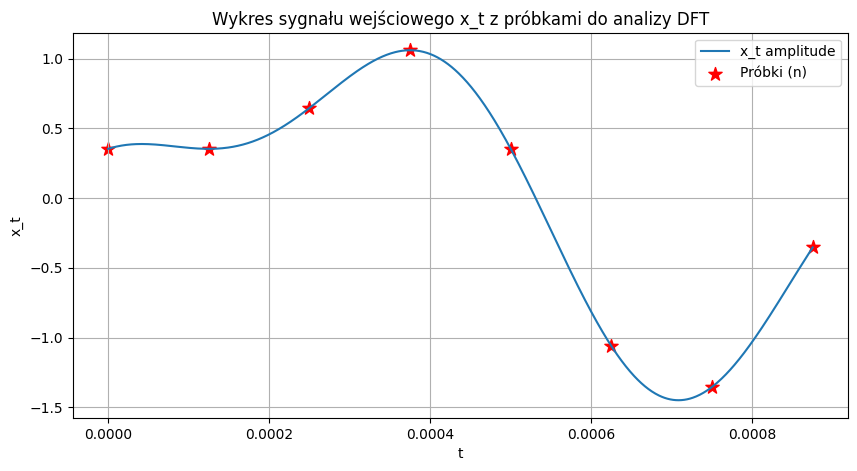

In [5]:
freq1 = 1000.0
freq2 = 2000.0
x_t = np.sin ( 2 * np.pi * freq1 * t ) + 0.5 * np.sin ( 2 * np.pi * freq2 * t + 3 * np.pi/4 )

plot_count = 1000 # 1000 punktów na optrzeby rysunku
t_plot = np.linspace ( 0 , ( N - 1 ) * t_s , num = plot_count )  # 1000 punktów w tym zakresie
x_t_plot = np.sin ( 2 * np.pi * freq1 * t_plot ) + 0.5 * np.sin ( 2 * np.pi * freq2 * t_plot + 3 * np.pi/4 )
plt.figure ( figsize = ( 10 , 5 ) )
plt.plot ( t_plot , x_t_plot , label = 'x_t amplitude' )
plt.scatter ( t , x_t , color = 'red' , marker = '*' , s = 100 , label = 'Próbki (n)' )
plt.title ( 'Wykres sygnału wejściowego x_t z próbkami do analizy DFT' )
plt.xlabel ( 't' )
plt.ylabel ( 'x_t' )
plt.legend ()
plt.grid ( True )
plt.show ()

Define dft ( x ) function which will calculate the DFT of the signal x ( t ) and takes in arguments:
x_t - input 1 dimensional real-valued signal.
N   - number of elements
f_s - sampling rate

In [ ]:
def dft ( x_t , f_s , N , threshold = 1e-10 ) :
    # Historia utworzenia funkcji https://chatgpt.com/share/e7a46f16-564f-4490-b71f-466276daa8bb
    # x_t: próbki sygnału w dziedzinie czasu
    # N: liczba próbek w sygnale
    half_N = N // 2 + 1  # Liczba elementów do analizy dla obu przypadków
    result = np.zeros ( ( half_N , 3 ) )  # Kolumny: częstotliwość, amplituda, faza

    for m in range ( half_N ) :
        X_m_freq = m * f_s / N
        X_m = 0j  # Inicjalizacja składowej częstotliwości jako liczby zespolonej
        for n in range ( N ) :
            X_m += x_t[n] * np.exp ( -2j * np.pi * m * n / N )
        # Ustawienie zerowej amplitudy i fazy dla małych wartości
        X_m /= N  # Skalowanie przez liczbę próbek
        if np.abs ( X_m ) < threshold:
            X_m_mag = 0
            X_m_phi = 0  # Faza zerowa dla bardzo małych wartości amplitudy
        else:
            if m == 0 or m == N//2:  # Nie podwajamy dla składnika DC i Nyquista
                X_m_mag = np.abs(X_m)
            else:
                X_m_mag = 2 * np.abs(X_m)  # Podwajanie amplitudy dla odpowiedzi częstotliwości
            X_m_phi = np.angle ( X_m , deg = True )  # Obliczanie fazy
        result[m] = [ X_m_freq , X_m_mag , X_m_phi ]

    return result

: 

X_m=array([[ 0.0e+00,  0.0e+00,  0.0e+00],
       [ 1.0e+03,  1.0e+00, -9.0e+01],
       [ 2.0e+03,  5.0e-01,  4.5e+01],
       [ 3.0e+03,  0.0e+00,  0.0e+00],
       [ 4.0e+03,  0.0e+00,  0.0e+00]])


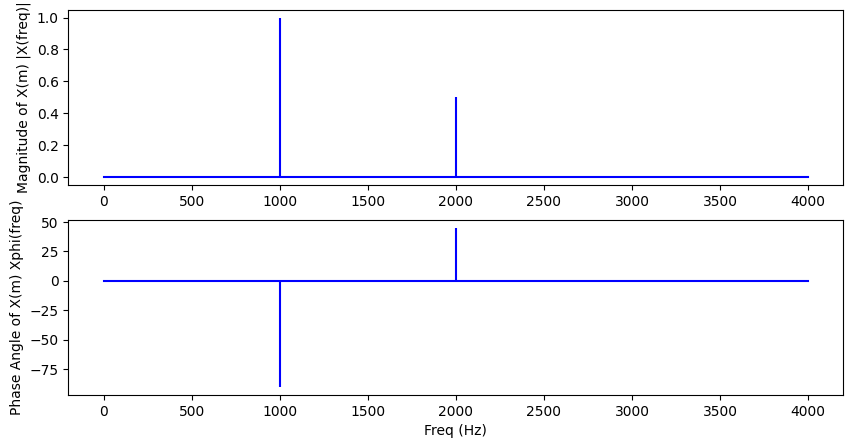

In [5]:
# Obliczenie DFT
X_m = dft ( x_t , f_s , N )

# Wyświetlenie wyników
print ( f"{X_m=}" )

plt.figure ( figsize = ( 10 , 5 ) )
plt.subplot ( 211 )
plt.stem ( X_m[:, 0] , X_m[:, 1] , 'b' ,  markerfmt = " " , basefmt = "-b" )
plt.ylabel ( 'Magnitude of X(m) |X(freq)|' )

plt.subplot ( 212 )
plt.stem ( X_m[:, 0] , X_m[:, 2] , 'b', markerfmt = " ", basefmt = "-b" )
plt.xlabel ( 'Freq (Hz)' )
plt.ylabel ( 'Phase Angle of X(m) Xphi(freq)' )
plt.show ()